# 2nd Recommendation System Model NETFLIX dataset by

## Angelo Mauro Calderon

In this topic let's work in a Netflix dataset trying to create this model based the spectator rate according 4 - 5 qualiffication based on colaborative filter

This dataset was taken from Kaggle.com by netflix competition: https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import gc

First of all I will work only with combined_data_1.txt and movie_titles.csv because the resources costs of the others ones files are massive to support my notebook.

The file "combined_data_1.txt" is a tar of a directory containing 17770 files, one
per movie. The first line of each file contains the movie id followed by a
colon. 
Each subsequent line in the file corresponds to a rating from a customer
and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.

In [2]:
def load_data(name):
    
    df  = pd.read_csv(name, header = None , names = ['User' , 'Rating'], usecols = [0,1])
    return df

df1 = load_data('Downloads/netf/combined_data_1.txt')
print(df1.shape)

(24058263, 2)


In [3]:
df1.head()

,User,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


Now let's to know wich movie corresponds to each qualiffication and we are going to count how many movies is there in df1 and identify them. 
I will import movie_titles.csv file:

In [4]:
df_title = pd.read_csv('Downloads/netf/movie_titles.csv' , encoding = 'ISO-8859-1' , index_col = 0, header = None , usecols = [0,2] , names = ['Movie_id' , 'Name'])
df_title.head()

,Name
Movie_id,
1,Dinosaur Planet
2,Isle of Man TT 2004 Review
3,Character
4,Paula Abdul's Get Up & Dance
5,The Rise and Fall of ECW


On this way, we can obtain the movie's name dued to its Id

In [5]:
movie_id = 1
print(df_title.loc[movie_id].Name)

Dinosaur Planet


How many identifiers is there?

In [6]:
movies_ids_df1 = df1.User[df1.Rating.isna()].values
print(movies_ids_df1)
print(len(movies_ids_df1))

['1:' '2:' '3:' ... '4497:' '4498:' '4499:']
4499


It is a Numpy's array and I have to transform it to be able to read it as integers and assuming there is no repeated values:

In [7]:
movies_ids_df1 = np.arange(1, len(movies_ids_df1) + 1)
print(movies_ids_df1)

[   1    2    3 ... 4497 4498 4499]


I will add a column to the Dataframe with the movie id according to its qualiffication and the followings columns being created: User , Rating , Movie_id.

Firstly, I will select the indexes where identifiers are showen:

In [8]:
df1_nan = pd.DataFrame(pd.isnull(df1.Rating))
df1_nan = df1_nan[df1_nan['Rating'] == True]
idx_movies_ids = df1_nan.index.values
print(idx_movies_ids)

[       0      548      694 ... 24056849 24057564 24057834]


I want to create a vector like df1 istances quantity's where 'movie_id' appears to its corresponding qualiffication. So I have the index where is each 'movie_id', I can get how many qualiffications there is in each movie.

In [9]:
idx_movies_ids = np.append(idx_movies_ids, df1.shape[0])
critics_amounts = np.diff(idx_movies_ids)
critics_amounts

array([ 548,  146, 2013, ...,  715,  270,  429], dtype=int64)

In [10]:
column_movie_id = np.array([])

for i in range(critics_amounts.size):
    aux = np.full(critics_amounts[i] , movies_ids_df1[i])
    column_movie_id = np.concatenate((column_movie_id , aux))

I will aggregate that column to the dataset and transform the data types and save space in my disk

In [11]:
df1['Movie_id'] = column_movie_id
del column_movie_id

df1.dropna(inplace = True)
df1['User'] = df1['User'].astype(int)
df1['Movie_id'] = df1['Movie_id'].astype(np.int16)
df1['Rating'] = df1['Rating'].astype(np.int8)

gc.collect()

0

In [12]:
df1.head()

,User,Rating,Movie_id
1,1488844,3,1
2,822109,5,1
3,885013,4,1
4,30878,4,1
5,823519,3,1


At this checkpoint, I have a definitive dataset for starting the EDA, beside that, I saved "garbage" in my memory which python may leave in RAM.
For that, I will save it as file:

In [13]:
if True:
    df1.to_csv('Downloads/netf/combined_data_1_with_movie_id.csv' , index = False)

# EDA

Let's import the two datasets

New dataset:

In [14]:
definitive_df = pd.read_csv('Downloads/netf/combined_data_1_with_movie_id.csv' , dtype = {'Rating': np.int8 , 'Movie_id': np.int16})
print(definitive_df.shape)
definitive_df.head()

(24053764, 3)


,User,Rating,Movie_id
0,1488844,3,1
1,822109,5,1
2,885013,4,1
3,30878,4,1
4,823519,3,1


In [15]:
definitive_df.dtypes

User        int64
Rating       int8
Movie_id    int16
dtype: object

Titles dataset:

In [16]:
df_title = pd.read_csv('Downloads/netf/movie_titles.csv' , encoding = 'ISO-8859-1' , index_col = 0 , header = None , usecols = [0,2] , names = ['Movie_id' , 'Name'])
df_title.head()

,Name
Movie_id,
1,Dinosaur Planet
2,Isle of Man TT 2004 Review
3,Character
4,Paula Abdul's Get Up & Dance
5,The Rise and Fall of ECW


1. How many unique users is there?

In [17]:
print(len(definitive_df['User'].unique()))

470758


2. How many movies qualiffied each user?

In [18]:
df1_by_users = definitive_df.groupby(['User']).count()
df1_by_users.head()

,Rating,Movie_id
User,,
6,153,153
7,195,195
8,21,21
10,49,49
25,4,4


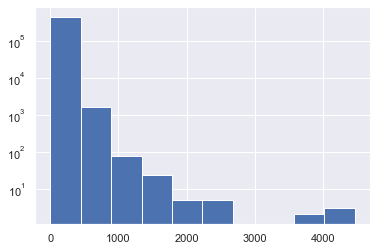

In [19]:
plt.hist(df1_by_users.Rating, log = True)
plt.show()

3. Qualiffications' distribution

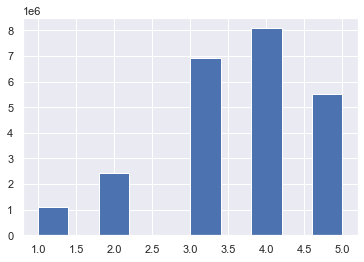

In [20]:
definitive_df['Rating'].hist()
plt.show()

I may conclude the mostly users have qualiffied 3 - 4 the movies that they have seen. 

4. Qualiffication's distributions for each user

In [21]:
quaff_user = definitive_df.User.value_counts()
quaff_user

305344     4467
387418     4422
2439493    4195
1664010    4019
2118461    3769
           ... 
1300341       1
2550360       1
11848         1
930788        1
594210        1
Name: User, Length: 470758, dtype: int64

<AxesSubplot:>

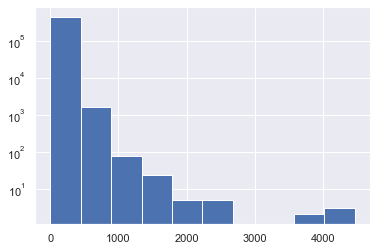

In [22]:
quaff_user.hist(log = True)


5. What is the movie with the highest qualiffication, how many qualiffications it has and what is the lowest qualiffication movie?

In [23]:
movies_seen = definitive_df.Movie_id.value_counts()
movies_seen.index = df_title.iloc[movies_seen.index].Name
movies_seen

Name
The Knights Templar                                   193941
Free Willy                                            162597
Jekyll & Hyde: The Musical                            160454
Drive Well                                            156183
The Masque of the Red Death / The Premature Burial    154832
                                                       ...  
Suzhou River                                              44
Earth 2: The Complete Series                              43
Black and White                                           42
Shadow of the Vampire                                     39
Mule Skinner Blues                                        36
Name: Movie_id, Length: 4499, dtype: int64

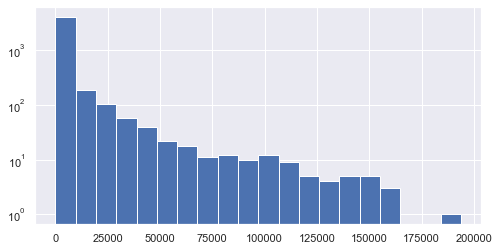

In [24]:
plt.figure(figsize = (8,4))
movies_seen.hist(log = True, bins = 20)
plt.show()

# Modeling

In [25]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

I will transform the dataset into format for being read with the library surprise

In [26]:
reader = Reader()

Then, I just work with 100.000 data because I assume that rendering the complete dataset will cost a lot of computing resources and I will instance it.

In [27]:
N_filas = 100000
data = Dataset.load_from_df(definitive_df[['User' , 'Movie_id' , 'Rating']][:N_filas] , reader)

In [28]:
trainset , testset = train_test_split(data , test_size = .25)

Let's train a SVD algorithm:

In [29]:
from surprise import SVD
algo = SVD()

In [30]:
algo.fit(trainset)

In [31]:
predictions = algo.test(testset)

In [32]:
predictions[1]

Prediction(uid=263736, iid=17, r_ui=3.0, est=2.886308098211497, details={'was_impossible': False})

The previous prediction indicates the user 263736 rated 3.0 the movie seen and our IMPORTANT stimated prediction was 2.88 so we can have a good signal that it works but now I have to check the prediction with movies that user didn't see yet...

In [33]:
algo.predict(1328945 , 28)

Prediction(uid=1328945, iid=28, r_ui=None, est=3.620166410384627, details={'was_impossible': False})

Apparently this user qualiffied the movie 28 with 3.6 without been seeing it

I will explore an user and see wich movies liked him and which ones may recommends our system:

In [34]:
user = 1539350
rating = 5
df_user = definitive_df[(definitive_df['User'] == user) & (definitive_df['Rating'] >= rating)]
df_user = df_user.reset_index(drop = True)
df_user['Name'] = df_title['Name'].loc[df_user.Movie_id].values
df_user

,User,Rating,Movie_id,Name
0,1539350,5,269,Parenthood
1,1539350,5,270,Sex and the City: Season 4
2,1539350,5,406,Hostage
3,1539350,5,1202,National Lampoon's Vacation
4,1539350,5,2862,The Silence of the Lambs
5,1539350,5,3151,Napoleon Dynamite
6,1539350,5,3605,The Wizard of Oz: Collector's Edition
7,1539350,5,3928,Nip/Tuck: Season 2
8,1539350,5,4159,Barbershop


I will create where save the recommendations:

In [36]:
user_recommendations = df_title.iloc[:4499].copy()
print(user_recommendations.shape)
user_recommendations.head()

(4499, 1)


,Name
Movie_id,
1,Dinosaur Planet
2,Isle of Man TT 2004 Review
3,Character
4,Paula Abdul's Get Up & Dance
5,The Rise and Fall of ECW


Let's take out the movies that he already have seen from dataset

In [39]:
user_seen = definitive_df[definitive_df['User'] == user]
print(user_seen.shape)
user_seen.head()

(97, 3)


,User,Rating,Movie_id
219870,1539350,3,33
409717,1539350,4,111
445206,1539350,3,127
664099,1539350,4,175
894718,1539350,4,197


In [40]:
user_recommendations.drop(user_seen.Movie_id, inplace = True)
user_recommendations = user_recommendations.reset_index()
user_recommendations.head()

,Movie_id,Name
0,1,Dinosaur Planet
1,2,Isle of Man TT 2004 Review
2,3,Character
3,4,Paula Abdul's Get Up & Dance
4,5,The Rise and Fall of ECW


And make the recommendations...

In [41]:
user_recommendations['Estimate_score'] = user_recommendations['Movie_id'].apply(lambda x: algo.predict(user , x).est)

In [42]:
user_recommendations = user_recommendations.sort_values('Estimate_score' , ascending = False)
print(user_recommendations.head(10))

    Movie_id                                               Name  \
12        13  Lord of the Rings: The Return of the King: Ext...   
24        25      Inspector Morse 31: Death Is Now My Neighbour   
4          5                           The Rise and Fall of ECW   
27        28                                    Lilo and Stitch   
0          1                                    Dinosaur Planet   
17        18                                   Immortal Beloved   
29        30                             Something's Gotta Give   
28        29                                            Boycott   
26        27  Sesame Street: Elmo's World: The Street We Liv...   
2          3                                          Character   

    Estimate_score  
12        4.477639  
24        3.976402  
4         3.951230  
27        3.854305  
0         3.794345  
17        3.767156  
29        3.764874  
28        3.708161  
26        3.672546  
2         3.640915  


# Evaluation

I will evaluate the RMSE's error testset between the predictions and the true qualiffications that users have rated the movies 

In [43]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 1.0476


1.0476360752234426

The work is succesfully achieved getting a good prediction according the error nearly to 1.0 

Now, I will try to optimize the parameters and comprove that this result is not a random result from my recommendation system model...

In [49]:
from surprise.model_selection import cross_validate

In [51]:
rmse_test_means = []
factors = [1,2,4,8,16,32,64,128,256]

for factor in factors:
    print(f'\n Factor numbers: {factor}')
    algo = SVD(n_factors = factor)
    cv = cross_validate(algo , data , measures = ['RMSE'] , cv = 3 , verbose = True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


 Factor numbers: 1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0450  1.0474  1.0424  1.0449  0.0020  
Fit time          2.78    2.84    2.81    2.81    0.03    
Test time         0.85    1.05    1.04    0.98    0.09    

 Factor numbers: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0469  1.0393  1.0493  1.0452  0.0042  
Fit time          2.90    2.85    2.90    2.88    0.02    
Test time         1.08    0.79    0.79    0.89    0.14    

 Factor numbers: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0498  1.0456  1.0442  1.0466  0.0024  
Fit time          3.19    3.38    3.44    3.34    0.11    
Test time         0.80    0.86    0.84    0.84    0.03    

 Factor numbers: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

                

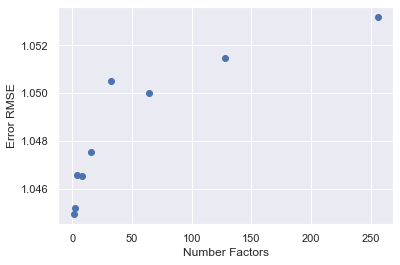

In [52]:
plt.scatter(factors , rmse_test_means)
plt.xlabel('Number Factors')
plt.ylabel('Error RMSE')
plt.show()

So, according the graphic the minimum computing exigency and the best minimum error in the model is just with a lower factor because it gives a better and same results as the others keeping the computing performance

meanwhile, I trained a SVD model and it uses gradient descense to minimize the cost fuction and the next step is to see the adeacuated values using GridSearhCV

In [53]:
from surprise.model_selection import GridSearchCV

In [55]:
param_grid = {'n_factors': [5,50,100] , 'n_epochs' : [5,10,20] , 'lr_all' : [0.001 , 0.002 , 0.005],
             'reg_all' : [0.002 , 0.02 , 0.2]}
gs = GridSearchCV(SVD , param_grid , measures = ['rmse'] , cv = 3 , n_jobs = -1)
gs.fit(data)

In [56]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.0460831162180164
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


Here I have comproved the best RMSE that I previously got with accuracy score evaluation in this case with GridSearch with I number factors equals to 5.